## Problem understanding😒

the data is contained of six features in which 5 features are independent  while one feature depends on the other features(dependent variable).That is,Species of any given flower depends on the 5 defined features.
The problem therefore is defined as a classification problem where the flowers are classified int three classes;
Iris-setosa', 'Iris-versicolor', 'Iris-virginica
Our aim is to predict the species of the flower given its sepal length,sepal width,petal length,petal width and its unique identity.


## Field description

the data which is a dataframe consist of 150 rows and  columns.
the 6 columns are;

Id  -the identinty of the flower             
SepalLengthCm    
SepalWidthCm     
PetalLengthCm    
PetalWidthCm     
Species    


In [1]:
# importing basic libraries used to analyze data

import pandas as pd #used in data analysis ans manipulation
import numpy as np#linear algebra
#data visualization
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns 
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

 
#importing Support Vector Machine Algorithm
from sklearn.svm import SVC
#Importing decision Tree
from sklearn.tree import DecisionTreeClassifier
#importing Random Forest
from sklearn.ensemble import RandomForestClassifier
#importing Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
#importing rogistic regression 
from sklearn.linear_model import LogisticRegression
import warnings #for warnings control
warnings.filterwarnings("ignore")
# Performance Evaluation
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score




## Data analysis
Here we are trrying to come up with insights from the data,analyze the nature of the data find its weakness and remove 
the weakness in order to fit for a model.
weakness are in terms of missing values and presence of dupricates in the data

In [2]:
df=pd.read_csv("Iris.csv") # defining our dataset as df
df.head(n=10) #displaying the first 10 fields in the dataset df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:

df.shape

(150, 6)

the dataset has 150 raws and 6 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64


The species beint the target variable has three distinct fields

In [6]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

the dataset does not contain any null fields


In [7]:
null_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
null_info=null_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
null_info=null_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
null_info

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
column type,int64,float64,float64,float64,float64,object
null values (nb),0,0,0,0,0,0
null values (%),0,0,0,0,0,0


In [8]:
df.describe(include="all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [9]:
#the three entries are;
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<AxesSubplot:title={'center':'Box-plot for the data'}>

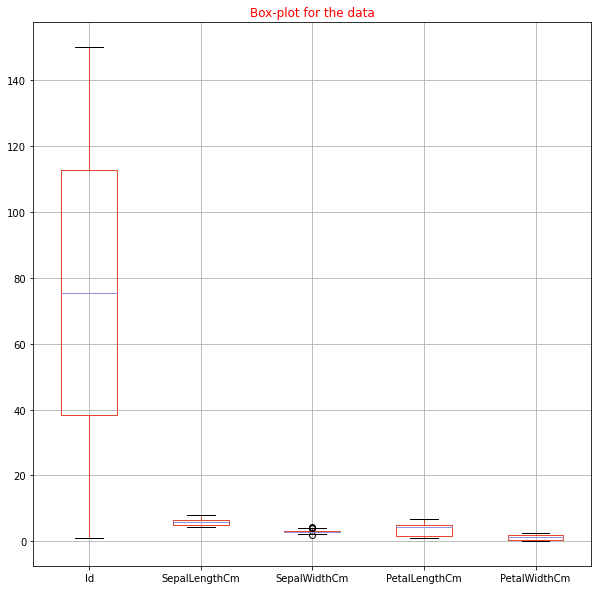

In [10]:
# checking for  outliers using a box plot
plt.figure(figsize=(10,10))
plt.title("Box-plot for the data",fontsize=12,color='r')
style.use('ggplot')

df.boxplot()


the dataset is consistent

## Data visualization 📉📊
@Univariate analysis
@Bivariate analysis

Through visualization,we want to:

    -Examine the distribion of variables

    -Explore new patterns and reveal hidden patterns in the data 

    -Identify the area of improvement



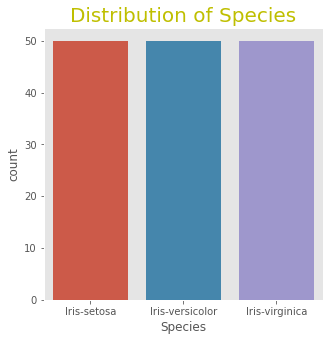

In [11]:
 #examining the distribution of the species feature
plt.figure(figsize=(5,5))
sns.countplot(x=df['Species'], data=df)


plt.title("Distribution of Species",fontsize=20,color="y")
plt.grid(False)



This implies that the different species in the data occur equally(the number of occurance of the the three species is the same)

#     Understanding the distribution of categorical variables

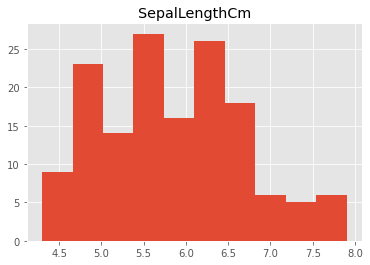

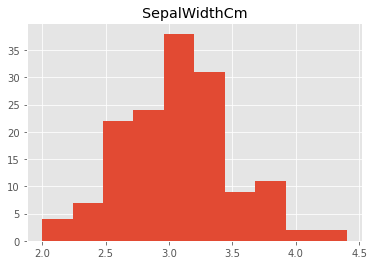

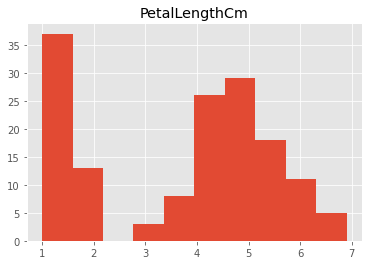

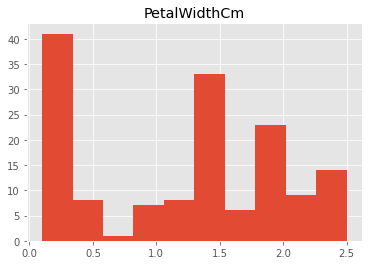

In [12]:
#histogram of sepal length in centimetres
df['SepalLengthCm'].hist()
plt.title("SepalLengthCm")
plt.show()

df['SepalWidthCm'].hist()
plt.title("SepalWidthCm")
plt.show()

df['PetalLengthCm'].hist()
plt.title("PetalLengthCm")
plt.show()

df['PetalWidthCm'].hist()
plt.title("PetalWidthCm")
plt.show()

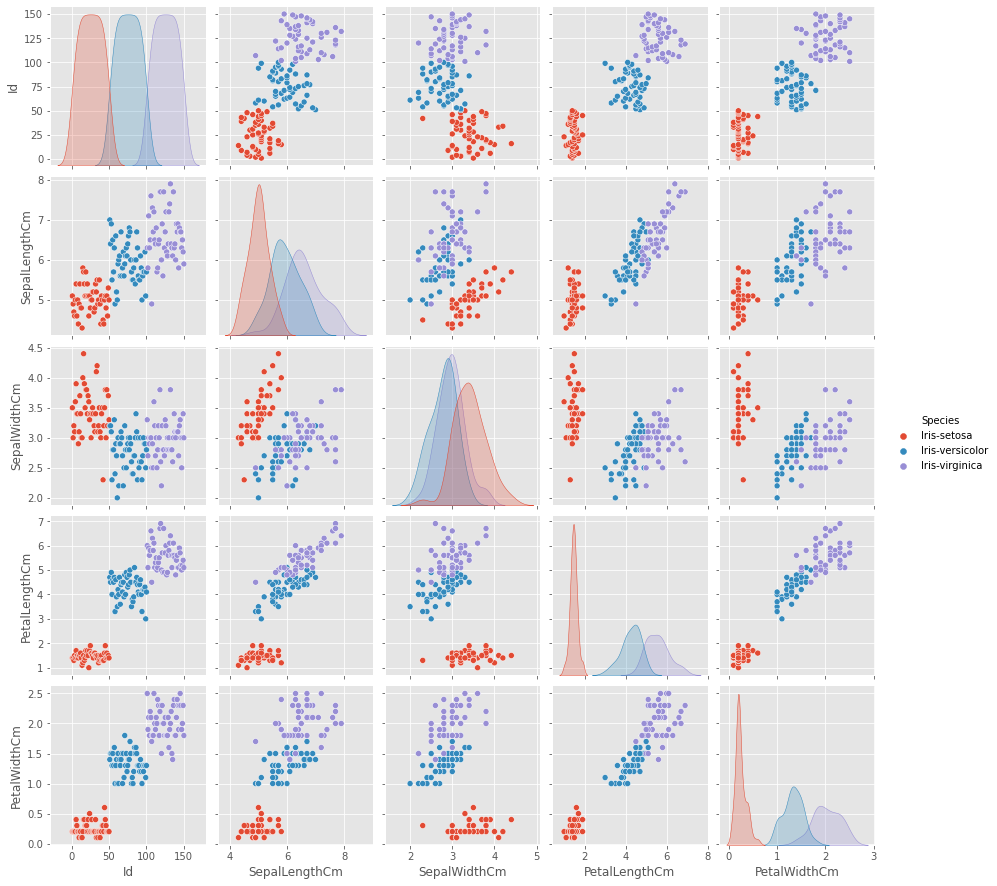

In [13]:
sns.pairplot(df,hue="Species")


<AxesSubplot:title={'center':'Variable Correlations'}>

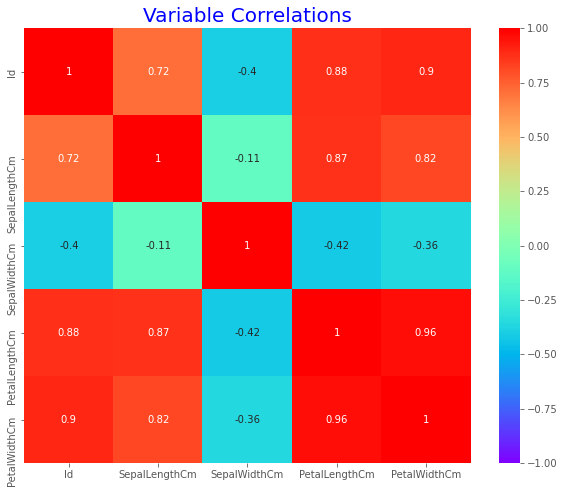

In [14]:
#checking on how our columns are correlated

plt.figure(figsize=(10,8))
plt.title("Variable Correlations",fontsize=20,color="b")
sns.heatmap(df.corr(),annot = True, vmax = 1 ,vmin=-1,cmap="rainbow")

Correlation values close to 1 implies that the variables has a positive correlation,close to -1 implies a negative correlation between the variables.

0 implies no correlation b etween variables

# Feature engineering

This will involve transforming our categorical data into numerical data.

In [15]:
#perfoming one-hot encoding
"""
df=pd.get_dummies(df,drop_first=True)
df.head(3)
"""


'\ndf=pd.get_dummies(df,drop_first=True)\ndf.head(3)\n'

In [16]:
## Label encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
#df.head()

df['Species'].unique()

 

array([0, 1, 2])

The species column have bn successfully transformed to numerical entries,


In [17]:
#separating the dependent and independent variables 
X=df.iloc[:,:-1]
X
y=df.iloc[:,-1]

# Since The Id feature can not affect the prediction, it can be dropped

X=X.drop(columns="Id")
X


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Feature Importance

In [18]:
#feature importance
""" 
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()

model.fit(X,y)




"""


' \nfrom sklearn.ensemble import ExtraTreesRegressor\nmodel=ExtraTreesRegressor()\n\nmodel.fit(X,y)\n\n\n\n\n'





###   Train-Test Split

In [19]:
#splittting the dataset into train set and set test in the ratio 80% to 20% respectively

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)


#### scaling the data

In [20]:
from sklearn.preprocessing import StandardScaler
#instance creation
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()



In [22]:
#training our model

lr.fit(X_train,y_train)

#predicting from the fitted model

y_pred=lr.predict(X_test)



In [23]:

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print("Confussion matrix\n",confusion_matrix(y_test, y_pred),"\n")  
print("Classification Report\n",classification_report(y_test, y_pred)) 

Confussion matrix
 [[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]] 

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.83      0.91        12
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.95      0.93      0.93        30



In [24]:
from sklearn.metrics import accuracy_score
print("The accuracy score of the model is: ",accuracy_score(y_pred,y_test)*100,"%")

The accuracy score of the model is:  93.33333333333333 %


###   KNN

#### feature scaling
Before making any actual predictions,we scale our feature so that all of them can be uniformely be evaluated

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fitting scalar-object over the X_train dataset

sc.fit(X_train)
X_train = sc.fit_transform(X_train)


# use scalar-object to transform the X_train and X_test data set
# your code goes here
X_test = sc.transform(X_test)

In [26]:

# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train,y_train)

# prediciding y
y_pred = clf.predict(X_test)

# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print("Confussion matrix\n",confusion_matrix(y_test, y_pred),"\n")  
print("Classification Report\n",classification_report(y_test, y_pred)) 

Confussion matrix
 [[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]] 

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        12
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [27]:
from sklearn.metrics import accuracy_score
print("The accuracy score of the model is: ",accuracy_score(y_pred,y_test)*100,"%")

The accuracy score of the model is:  96.66666666666667 %


### Naive Bayes


In [28]:
from sklearn.naive_bayes import GaussianNB
# creating an instance of the model
model=GaussianNB()

#training
model.fit(X_train,y_train)

#predicting
y_pred=model.predict(X_test)



In [29]:
#evaluating the Naive Bayes Model

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("confussion matrix:\n ",confusion_matrix(y_test,y_pred), "\n accuracy score:\n",
accuracy_score(y_pred,y_test))

confussion matrix:
  [[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]] 
 accuracy score:
 0.9333333333333333


In [30]:
print("The accuracy score of the model is: ",accuracy_score(y_pred,y_test)*100,"%")

The accuracy score of the model is:  93.33333333333333 %


### SVM

In [31]:
from sklearn.svm import SVC
clf=SVC(kernel='rbf', random_state=5)

#training the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

from sklearn.svm import SVC
clf=SVC(kernel='rbf',random_state=9)
clf.fit(X_train,y_train)

#predicting from the model

y_pred=clf.predict(X_test)

In [32]:
#Model evaluation

from sklearn.metrics import accuracy_score,confusion_matrix

print("confussion matrix:\n",confusion_matrix(y_test,y_pred),"\nAccuracy score\n ",accuracy_score(y_test,y_pred))

confussion matrix:
 [[15  0  0]
 [ 0  9  0]
 [ 0  2 12]] 
Accuracy score
  0.9473684210526315


In [33]:
print("The accuracy score of the model is: ",accuracy_score(y_pred,y_test)*100,"%")

The accuracy score of the model is:  94.73684210526315 %
